In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Filtered
# 2) Sorted
# 3) Normalized
# 4) Merging
# 5) Imputation
# 6) Handling Duplicates
# 7) Removing Data

# Load CSV file
df = pd.read_csv('titles.csv')
dataset2 = pd.read_csv('titles_with_actors.csv')

# Merging dataset that has shows and movies with the actors, and the dataset that contains shows and movies with IMDB ratings.
merged_df = dataset2[['title', 'cast', 'director']].merge(df, on='title', how='inner')
df = merged_df

# Drop rows where the 'ratings' column is empty
df = df.dropna(subset=['imdb_score'])
df = df.dropna(subset=['tmdb_score'])

# Drop rows were casts are empty
df = df.dropna(subset=['cast'])

# Rounded the scores to whole numbers in the imdb score column
df['imdb_score'] = df['imdb_score'].round(1)

# Filter out rows where the 'year' column is 1999 or less
df = df[df['release_year'] > 1999]

# Drop duplicate rows based on all columns
df = df.drop_duplicates()

# Drop all age certifications that are empty
df = df.dropna(subset=['age_certification'])

# fill in missing values in the 'seasons' column with the value 0.0
df['seasons'].fillna(0.0, inplace=True)

# sorting data by imdb ratings
df = df.sort_values(by='imdb_score', ascending=False)
# added a column to sort movies and shows
df['sort_order'] = df['type'].apply(lambda x: 1 if x == 'SHOW' else 2)
df_sorted = df.sort_values(by=['sort_order'])
# sorted the ratings with preserving the way the type is sorted("movie", "show")
df_sorted = df.sort_values(by=['type', 'imdb_score'], ascending=[True, False])

df = df_sorted


# Save the cleaned data to a new CSV file
df.to_csv('cleaned_titles.csv', index=False)



In [81]:
# summary statistics
print(df.describe())

# correlation matrix
print(df.corr())


# mean, median, mode
print('Mean: ', np.mean(df))
print('Median: ', np.median(df))
print('Mode: ', np.mode(df))

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   1785.000000  1785.000000  1785.000000  1785.000000  1.781000e+03   
mean    2016.588796    68.168067     1.419048     6.721625  3.671660e+04   
std        4.114408    40.577402     2.271454     1.136987  1.158628e+05   
min     2000.000000     0.000000     0.000000     2.000000  6.000000e+00   
25%     2015.000000    33.000000     0.000000     6.000000  1.302000e+03   
50%     2018.000000    55.000000     1.000000     6.800000  5.376000e+03   
75%     2019.000000   100.000000     2.000000     7.500000  2.398700e+04   
max     2022.000000   214.000000    42.000000     9.500000  2.294231e+06   

       tmdb_popularity   tmdb_score   sort_order  
count      1785.000000  1785.000000  1785.000000  
mean         27.699296     7.065143     1.422969  
std          78.919838     1.064852     0.494169  
min           0.600000     1.000000     1.000000  
25%           5.390000     6.400000     1.000000  
50%      

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: '<' not supported between instances of 'int' and 'str'

In [82]:
# Sort the data by IMDB score in descending order
sorted_data = df.sort_values('imdb_score', ascending=False)

# Select the top 25 rows from the sorted data
top_25 = sorted_data.head(50)

# Display the top 25 movies and shows with their IMDB scores
print(top_25[['title', 'type', 'imdb_score']])

                                           title   type  imdb_score
3963                                Breaking Bad   SHOW         9.5
2664                                  Our Planet   SHOW         9.3
1743                  Avatar: The Last Airbender   SHOW         9.3
2088                                  Reply 1988   SHOW         9.2
4                                   Kota Factory   SHOW         9.1
440                               The Last Dance   SHOW         9.1
1684                                   My Mister   SHOW         9.1
3832                                  DEATH NOTE   SHOW         9.0
282                                       Okupas   SHOW         9.0
1180  Leah Remini: Scientology and the Aftermath   SHOW         9.0
513                              Attack on Titan   SHOW         9.0
2568                            When They See Us   SHOW         8.9
979                                   Still Game   SHOW         8.9
1279    David Attenborough: A Life on Our Planet

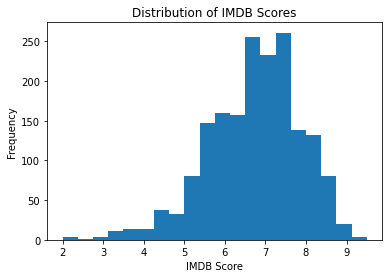

In [83]:
import matplotlib.pyplot as plt

# Plot the histogram of the 'imdb_score' column
plt.hist(df['imdb_score'], bins=20)
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB Scores')
plt.show()




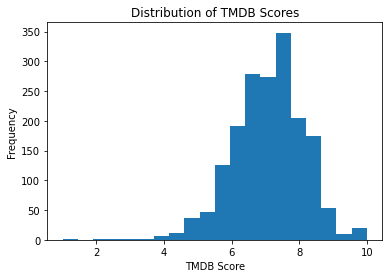

In [84]:
# Plot the histogram of the 'imdb_score' column
plt.hist(df['tmdb_score'], bins=20)
plt.xlabel('TMDB Score')
plt.ylabel('Frequency')
plt.title('Distribution of TMDB Scores')
plt.show()


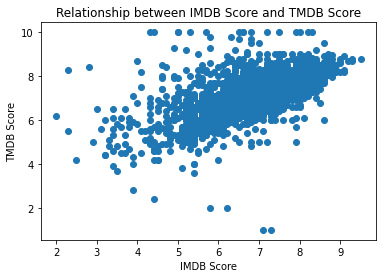

In [85]:
# Plot a scatterplot of 'imdb_score' against 'tmdb_score'
plt.scatter(df['imdb_score'], df['tmdb_score'])
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Relationship between IMDB Score and TMDB Score')
plt.show()

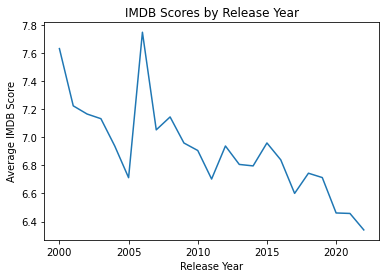

In [86]:
# Line graph of IMDB scores over time
imdb_scores_by_year = df.groupby('release_year')['imdb_score'].mean()
plt.plot(imdb_scores_by_year)
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.title('IMDB Scores by Release Year')
plt.show()


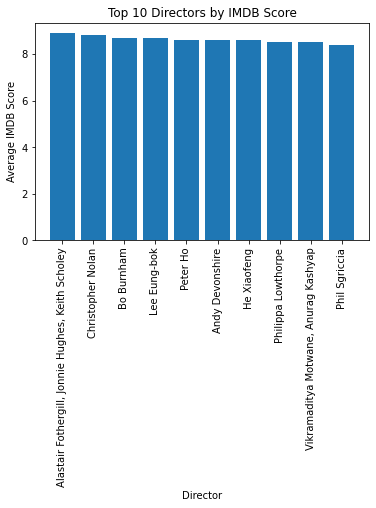

In [87]:
# Bar graph of top 10 directors by IMDB score
top_directors = df.groupby('director')['imdb_score'].mean().sort_values(ascending=False)[:10]
plt.bar(top_directors.index, top_directors.values)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Average IMDB Score')
plt.title('Top 10 Directors by IMDB Score')
plt.show()




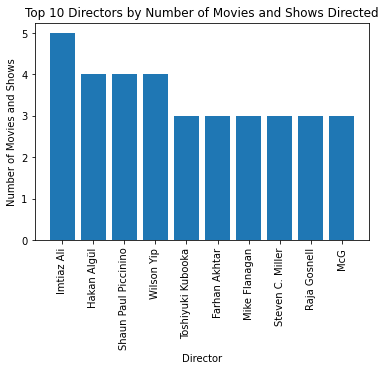

In [88]:
# Group the data by director and count the number of movies and shows each directed
director_counts = df.groupby('director')['id'].count().sort_values(ascending=False)[:10]

# Plot a bar graph of the director counts
plt.bar(director_counts.index, director_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Number of Movies and Shows')
plt.title('Top 10 Directors by Number of Movies and Shows Directed')
plt.show()

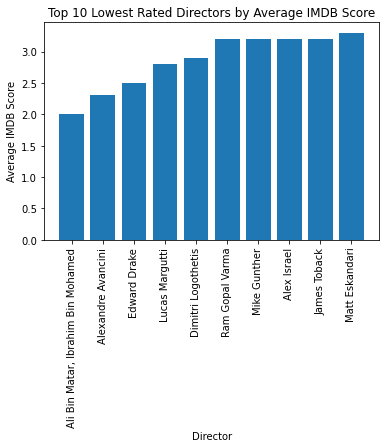

In [89]:
# Group the data by director and calculate the average IMDB score for each director
director_scores = df.groupby('director')['imdb_score'].mean().sort_values()[:10]

# Plot a bar graph of the director scores
plt.bar(director_scores.index, director_scores.values)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Average IMDB Score')
plt.title('Top 10 Lowest Rated Directors by Average IMDB Score')
plt.show()


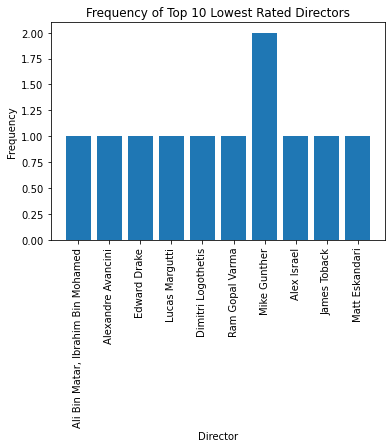

In [90]:
# Get the frequency of each director in the data
director_counts = df['director'].value_counts()

# Get the lowest rated directors
lowest_rated_directors = df.groupby('director')['imdb_score'].mean().sort_values()[:10].index

# Get the frequency of the lowest rated directors
lowest_rated_director_counts = director_counts[lowest_rated_directors]

# Plot a bar graph of the lowest rated directors' frequency
plt.bar(lowest_rated_director_counts.index, lowest_rated_director_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Lowest Rated Directors')
plt.show()


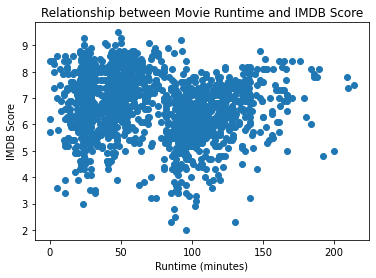

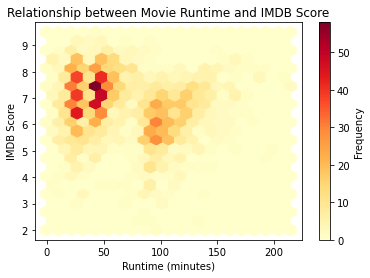

In [91]:
# Create a scatter plot of runtime vs IMDB score
plt.scatter(df['runtime'], df['imdb_score'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.title('Relationship between Movie Runtime and IMDB Score')
plt.show()

# Create a hexbin plot of runtime vs IMDB score
plt.hexbin(df['runtime'], df['imdb_score'], gridsize=20, cmap='YlOrRd')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.title('Relationship between Movie Runtime and IMDB Score')
cb = plt.colorbar()
cb.set_label('Frequency')
plt.show()


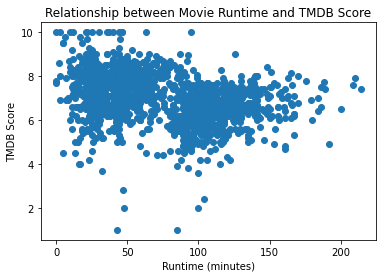

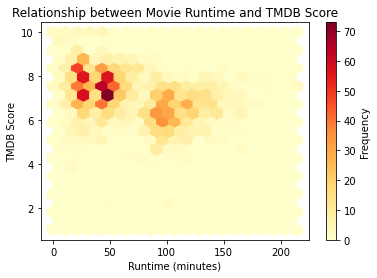

In [92]:
# Create a scatter plot of runtime vs IMDB score
plt.scatter(df['runtime'], df['tmdb_score'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('TMDB Score')
plt.title('Relationship between Movie Runtime and TMDB Score')
plt.show()

# Create a hexbin plot of runtime vs IMDB score
plt.hexbin(df['runtime'], df['tmdb_score'], gridsize=20, cmap='YlOrRd')
plt.xlabel('Runtime (minutes)')
plt.ylabel('TMDB Score')
plt.title('Relationship between Movie Runtime and TMDB Score')
cb = plt.colorbar()
cb.set_label('Frequency')
plt.show()


In [93]:
# Statistics for IMDB scores 
mean = np.mean(df['imdb_score'])
median = np.median(df['imdb_score'])
mode = df['imdb_score'].mode().values
std_dev = np.std(df['imdb_score'])
range_min = df['imdb_score'].min()
range_max = df['imdb_score'].max()
iqr = np.percentile(df['imdb_score'], 75) - np.percentile(df['imdb_score'], 25)

# Print statistics of the data for IMDB scores
print('Mean: {:.1f}'.format(mean))
print('Median: {:.1f}'.format(median))
print('Mode: {}'.format(mode))
print('Standard Deviation: {:.1f}'.format(std_dev))
print('Range: {:.1f} - {:.1f}'.format(range_min, range_max))
print('Interquartile Range: {:.1f}'.format(iqr))


Mean: 6.7
Median: 6.8
Mode: [7.3]
Standard Deviation: 1.1
Range: 2.0 - 9.5
Interquartile Range: 1.5


In [94]:
# Statistics for TMDB scores 
mean = np.mean(df['tmdb_score'])
median = np.median(df['tmdb_score'])
mode = df['tmdb_score'].mode().values
std_dev = np.std(df['tmdb_score'])
range_min = df['tmdb_score'].min()
range_max = df['tmdb_score'].max()
iqr = np.percentile(df['tmdb_score'], 75) - np.percentile(df['tmdb_score'], 25)

# Print statistics of the data for TMDB scores
print('Mean: {:.1f}'.format(mean))
print('Median: {:.1f}'.format(median))
print('Mode: {}'.format(mode))
print('Standard Deviation: {:.1f}'.format(std_dev))
print('Range: {:.1f} - {:.1f}'.format(range_min, range_max))
print('Interquartile Range: {:.1f}'.format(iqr))



Mean: 7.1
Median: 7.1
Mode: [7.3]
Standard Deviation: 1.1
Range: 1.0 - 10.0
Interquartile Range: 1.4


In [95]:
# Sort the data by IMDB score in descending order
sorted_data = df.sort_values('imdb_score', ascending=False)

# Select the top 25 rows from the sorted data
top_25 = sorted_data.head(10)

# Display the top 25 movies and shows with their IMDB scores
print(top_25[['imdb_score', 'type', 'cast']])

      imdb_score  type                                               cast
3963         9.5  SHOW  Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...
2664         9.3  SHOW                                 David Attenborough
1743         9.3  SHOW  Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...
2088         9.2  SHOW  Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...
4            9.1  SHOW  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
440          9.1  SHOW      Michael Jordan, Scottie Pippen, Dennis Rodman
1684         9.1  SHOW  Lee Sun-kyun, Lee Ji-eun (IU), Go Du-sim, Park...
3832         9.0  SHOW  Kappei Yamaguchi, Alessandro Juliani, Mamoru M...
282          9.0  SHOW  Rodrigo de la Serna, Diego Alonso, Ariel Stalt...
1180         9.0  SHOW                           Leah Remini, Mike Rinder


In [96]:
# Separate the movies and shows data
movies_data = df[df['type'] == 'MOVIE']
shows_data = df[df['type'] == 'SHOW']

# Compute basic statistics for movies
mean_movies_imdb = np.mean(movies_data['imdb_score'])
median_movies_imdb = np.median(movies_data['imdb_score'])
std_dev_movies_imdb = np.std(movies_data['imdb_score'])
iqr_movies_imdb = np.percentile(movies_data['imdb_score'], 75) - np.percentile(movies_data['imdb_score'], 25)

# Compute basic statistics for shows
mean_shows_imdb = np.mean(shows_data['imdb_score'])
median_shows_imdb = np.median(shows_data['imdb_score'])
std_dev_shows_imdb = np.std(shows_data['imdb_score'])
iqr_shows_imdb = np.percentile(shows_data['imdb_score'], 75) - np.percentile(shows_data['imdb_score'], 25)

# Print the basic statistics
print('Movies Mean: {:.1f}'.format(mean_movies_imdb))
print('Movies Median: {:.1f}'.format(median_movies_imdb))
print('Movies Standard Deviation: {:.1f}'.format(std_dev_movies_imdb))
print('Movies Interquartile Range: {:.1f}'.format(iqr_movies_imdb))
print()
print('Shows Mean: {:.1f}'.format(mean_shows_imdb))
print('Shows Median: {:.1f}'.format(median_shows_imdb))
print('Shows Standard Deviation: {:.1f}'.format(std_dev_shows_imdb))
print('Shows Interquartile Range: {:.1f}'.format(iqr_shows_imdb))





Movies Mean: 6.2
Movies Median: 6.3
Movies Standard Deviation: 1.1
Movies Interquartile Range: 1.4

Shows Mean: 7.1
Shows Median: 7.2
Shows Standard Deviation: 1.0
Shows Interquartile Range: 1.3


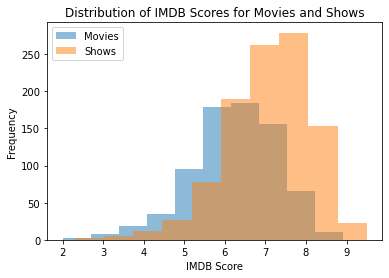

In [97]:
# Plot imdb_score of movies and show as a histogram 
plt.hist(movies_data['imdb_score'], alpha=0.5, label='Movies')
plt.hist(shows_data['imdb_score'], alpha=0.5, label='Shows')
plt.title('Distribution of IMDB Scores for Movies and Shows')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

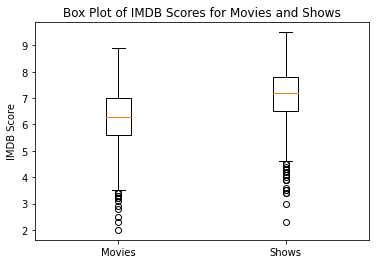

In [98]:
# Plot box plots of the data
plt.boxplot([movies_data['imdb_score'], shows_data['imdb_score']], labels=['Movies', 'Shows'])
plt.title('Box Plot of IMDB Scores for Movies and Shows')
plt.ylabel('IMDB Score')
plt.show()

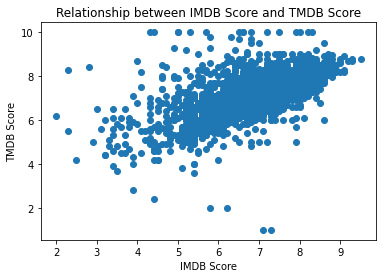

In [99]:
# Plot a scatterplot of 'imdb_score' against 'tmdb_score'
plt.scatter(df['imdb_score'], df['tmdb_score'])
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Relationship between IMDB Score and TMDB Score')
plt.show()

In [100]:
#Phase Two
#1. Algorithms/Visualizations [25 marks]: Apply 5 different significant and relevant
# algorithms (ML, MR, and/or statistical models) to your data and create visualizations for
# the results. For 487 students: at least 1 of the 5 algorithms must be one that was not
# discussed in class. For 587 students: at least 2 must be from outside of class.
# Algorithms discussed in class are: Linear Regression, k-Means, k-NN, Naive Bayes, and
# Logistic Regression. The outside algorithms can come from the class textbooks, or other
# sources. Cite the appropriate sources for each outside algorithm you choose to
# apply

# 2. Explanation and Analysis [25 marks]: For each of the 5 above algorithms, provide
# justification for why you chose the particular algorithm for your particular problem, work
# you had to do to tune/train the model, and discuss the effectiveness of the algorithm
# when applied to your data to answer questions related to your problem statement. This
# should include discussion of any relevant metrics for demonstrating model effectiveness,
# as well as any intelligence you were able to gain from application of the algorithm to your
# data.

Accuracy:  0.7338935574229691
Confusion Matrix:
 [[154  33]
 [ 62 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       187
           1       0.77      0.64      0.69       170

    accuracy                           0.73       357
   macro avg       0.74      0.73      0.73       357
weighted avg       0.74      0.73      0.73       357



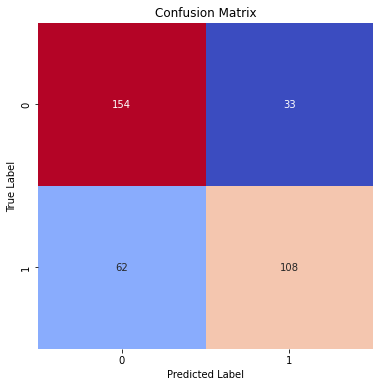

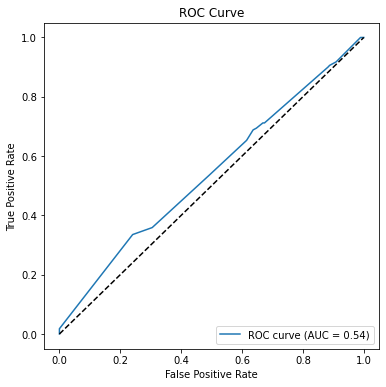

In [101]:
# 1) Logistic Regression Algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use EDA Cleaned Dataset
df = pd.read_csv('cleaned_titles.csv')

# Create and define the threshold for a "good" movie or show
threshold = 7.0
df['is_good'] = (df['imdb_score'] >= threshold).astype(int)

# Define Feature and Target for model
X = df[['tmdb_score']]  # Feature
y = df['is_good']       # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a logistic regression model
classifier = LogisticRegression()

# Train the model using the training set
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix with True Label on the Y-axis and Predicted Label on the X-axis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve which shows the True and False Positive Rates
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



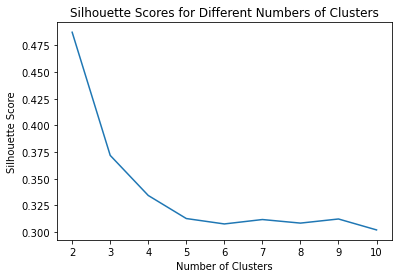

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


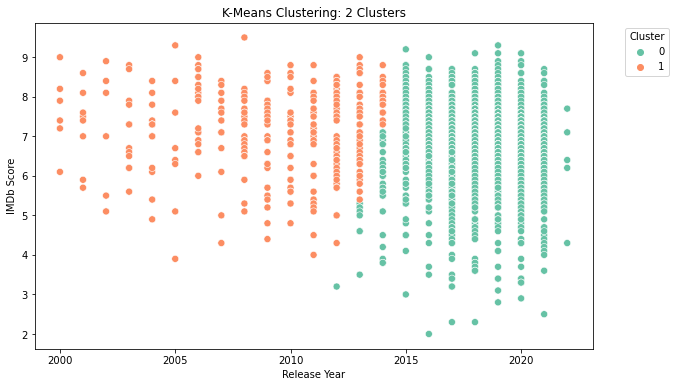

In [102]:
# 2) K-Means Algorithm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose relevant features for clustering
features = ['release_year', 'seasons', 'imdb_score']
X = df[features]

# Normalize the numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the silhouette score defined in an array 
n_clusters = range(2, 11)
silhouette_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = n_clusters[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot the silhouette scores for each number of clusters
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

# K-Means clustering with the optimal number of clusters
optimal_clusters = n_clusters[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='imdb_score', hue='cluster', palette='Set2', s=50)
plt.title(f'K-Means Clustering: {optimal_clusters} Clusters')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


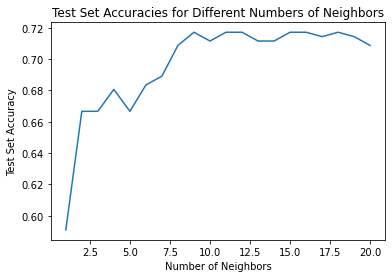

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       211
           1       0.65      0.66      0.66       146

    accuracy                           0.72       357
   macro avg       0.71      0.71      0.71       357
weighted avg       0.72      0.72      0.72       357



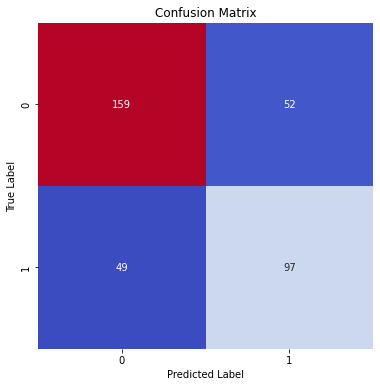

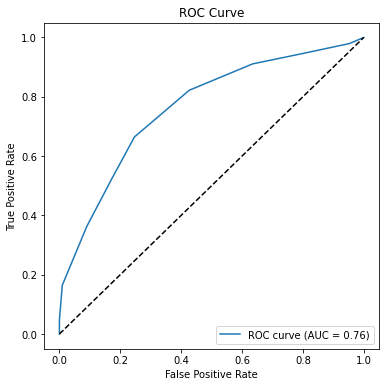

In [103]:
# 3) K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#Use EDA cleaned dataset 
df = pd.read_csv('cleaned_titles.csv')

# Define the threshold for a "good" movie or show
threshold = 7.0

# Create a binary target variable for classification
df['is_good'] = (df['imdb_score'] >= threshold).astype(int)

# Select the features and target
X = df[['tmdb_score']]  # Feature
y = df['is_good']       # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Find the optimal number of neighbors for K-NN
neighbors = range(1, 21)
test_accuracies = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    test_accuracies.append(knn.score(X_test, y_test))
    
# Plot test set accuracies for different numbers of neighbors
plt.plot(neighbors, test_accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Set Accuracy')
plt.title('Test Set Accuracies for Different Numbers of Neighbors')
plt.show()

# Apply K-NN with the optimal number of neighbors
optimal_neighbors = neighbors[np.argmax(test_accuracies)]
knn = KNeighborsClassifier(n_neighbors=optimal_neighbors)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

# Plot confusion matrix with True Label on the Y-axis and Predicted Label on the X-axis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve which shows the True and False Positive Rates
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



Mean squared error:  0.7840802100694465
R-squared score:  0.37271571143999294


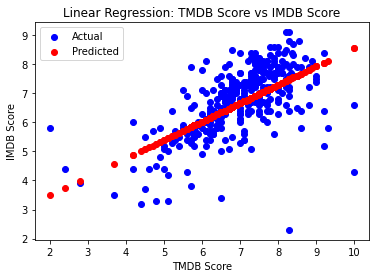

In [104]:
# 4) Linear Regression Algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use EDA cleaned dataset 
df = pd.read_csv('cleaned_titles.csv')

# Select the features and target which are IMDB score and TMDB score
X = df[['tmdb_score']]  # Feature
y = df['imdb_score']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
regressor = LinearRegression()

# Train the model using the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

# Display the results of the data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('TMDB Score')
plt.ylabel('IMDB Score')
plt.legend()

plt.title('Linear Regression: TMDB Score vs IMDB Score')
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       211
           1       0.57      0.72      0.64       146

    accuracy                           0.67       357
   macro avg       0.67      0.67      0.66       357
weighted avg       0.69      0.67      0.67       357



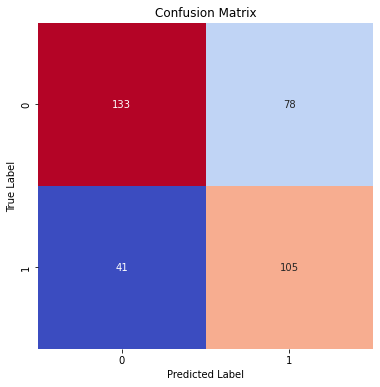

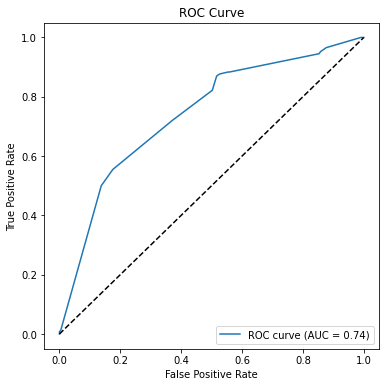

In [105]:
# 5) Decision Tree algorithm 
# Citation: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Use EDA cleaned dataset 
df = pd.read_csv('cleaned_titles.csv')

# Define the threshold for a "good" movie or show (in this example, 7 is our threshold)
threshold = 7.0

# Create a binary target variable for classification
df['is_good'] = (df['imdb_score'] >= threshold).astype(int)

# Select the features and target
X = df[['tmdb_score']]  # Feature
y = df['is_good']       # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# Plot confusion matrix with True Label on the Y-axis and Predicted Label on the X-axis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve which shows the True and False Positive Rates
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()